In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import PIL,os


import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [9]:
#load data
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [10]:
os.curdir

'.'

In [11]:
len(X_train)

60000

In [12]:
len(X_test)

10000

0


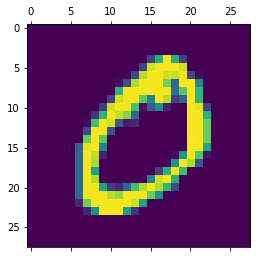

In [13]:
print(y_train[1])
plt.matshow(X_train[1])

In [14]:
def infor(i):
    print(y_train[i])
    plt.matshow(X_train[i])

2


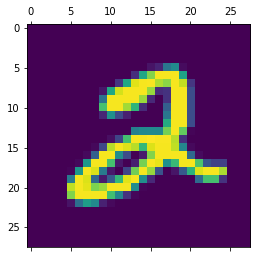

In [15]:
infor(5)

In [16]:
X_train[1][27]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [17]:
X_train=X_train/255
X_test=X_test/255

In [18]:
X_train1=X_train.reshape(len(X_train),28*28)
X_test1=X_test.reshape(len(X_test),28*28)

In [19]:
model=Sequential([
    
    keras.layers.Dense(1000,activation='sigmoid'),
    keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train1,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 3ms/step - loss: 0.3306 - accuracy: 0.9033
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1624 - accuracy: 0.9521
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1031 - accuracy: 0.9683
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0698 - accuracy: 0.9786
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0504 - accuracy: 0.9843


In [20]:
pred=model.predict(X_test1)

313/313 [==============================] - 1s 2ms/step


In [21]:
model.evaluate(X_test1,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0705 - accuracy: 0.9776


[0.0705321803689003, 0.9775999784469604]

In [22]:
pred[1]

array([7.7398632e-08, 5.8758509e-04, 9.9938738e-01, 2.2004329e-05,
       5.7673441e-12, 1.3678385e-06, 7.9285752e-07, 3.1279285e-11,
       7.6183170e-07, 2.2671056e-11], dtype=float32)

In [23]:
y_test[1]

2

In [24]:
pred1=[np.argmax(i) for i in pred]
pred1[1]

2

Text(69.0, 0.5, 'actual')

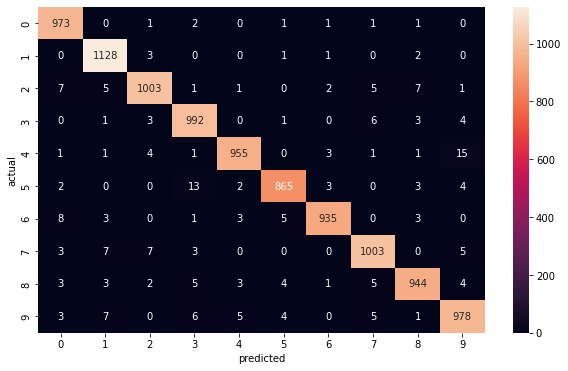

In [25]:
import math
cm=tf.math.confusion_matrix(y_test,pred1)
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')

In [38]:

model1=keras.Sequential([
    keras.layers.Conv2D(filters=50,kernel_size=(4,4),padding='same',strides=(1,1),activation='relu',input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=50,kernel_size=(4,4),padding='same',strides=(1,1),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
                        ])
TB=tf.keras.callbacks.TensorBoard(log_dir='C:\\Users\\Arbaj',histogram_freq=1)
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.fit(X_train,y_train,epochs=5,callbacks=[TB])

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0957 - accuracy: 0.9702
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0368 - accuracy: 0.9890
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0239 - accuracy: 0.9921
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0161 - accuracy: 0.9948
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0145 - accuracy: 0.9953


In [27]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0243 - accuracy: 0.9937


[0.024349315091967583, 0.9937000274658203]

In [28]:
predC=model1.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [29]:
predC1=[np.argmax(i) for i in predC]
predC1[1]

2

In [30]:
y_test[1]

2

In [31]:
cmC=tf.math.confusion_matrix(y_test,predC1)

313/313 [==============================] - 1s 4ms/step - loss: 0.0243 - accuracy: 0.9937


Text(0.5, 1.0, 'CNN')

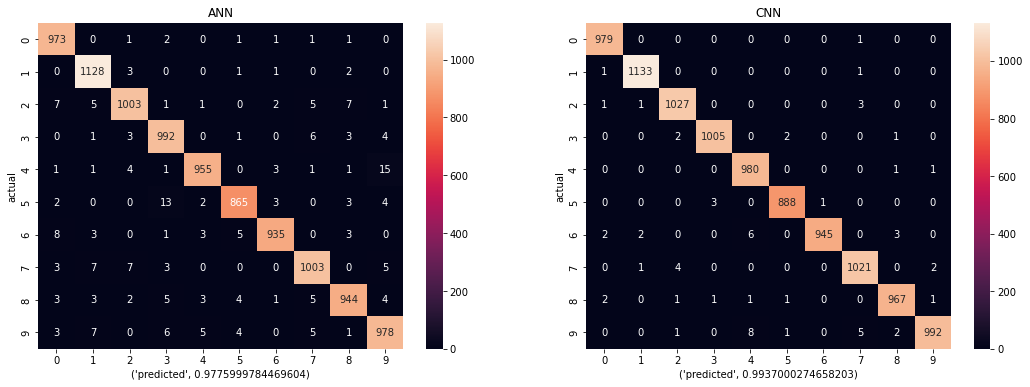

In [32]:
import seaborn as sns
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel(('predicted',(model.evaluate(X_test1,y_test))[1]))
plt.ylabel('actual')
plt.title('ANN')
plt.subplot(1,2,2)
sns.heatmap(cmC,annot=True,fmt='d')
plt.xlabel(('predicted',(model1.evaluate(X_test,y_test))[1]))
plt.ylabel('actual')
plt.title('CNN')

In [33]:
pd.__version__

'1.4.2'

In [34]:
pd.show_versions()

C:\Users\Arbaj\anaconda3\envs\tensorflow\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit           : 4bfe3d07b4858144c219b9346329027024102ab6
python           : 3.9.12.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.22000
machine          : AMD64
processor        : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_India.1252

pandas           : 1.4.2
numpy            : 1.21.5
pytz             : 2021.3
dateutil         : 2.8.2
pip              : 21.2.4
setuptools       : 61.2.0
Cython           : 0.29.28
pytest           : 7.1.1
hypothesis       : None
sphinx           : 4.4.0
blosc            : None
feather          : None
xlsxwriter       : 3.0.3
lxml.etree       : 4.8.0
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.11.3
IPython          : 8.2.0
pandas_datareader: None
bs4              : 4.11.1
bottleneck       : 1.3.4
brotli

In [35]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [41]:
%load_ext tensorboard
%tensorboard --logdir C:\\Users\\Arbaj/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
